# 3 QB QFT


In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [2]:
#create quantum circuit with 3 qb

qc = QuantumCircuit(3)

qc.h(2)

#controlled rotation if qb1 in state |1> 

qc.cp(np.pi/2,1,2)

# controlled rotation if qb0 in state |1>

qc.cp(np.pi/4, 0, 2)

#same process for qb 0 and qb 1:

qc.h(1) 

#rotate if qb0 in state |1>
qc.cp(np.pi/2, 0, 1)

qc.h(0)

#swap qb 0 and 2

qc.swap(0,2)

qc.draw()

┌───┐   
q_0: ───────────────────■──────────────■─────┤ H ├─X─
                        │     ┌───┐┌───┴────┐└───┘ │ 
q_1: ─────────■─────────┼─────┤ H ├┤ P(π/2) ├──────┼─
     ┌───┐┌───┴────┐┌───┴────┐└───┘└────────┘      │ 
q_2: ┤ H ├┤ P(π/2) ├┤ P(π/4) ├─────────────────────X─
     └───┘└────────┘└────────┘

In [3]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

In [4]:
backend = Aer.get_backend('statevector_simulator')
job = execute(qc,backend)
result = job.result()
out = result.get_statevector(qc,decimals = 3)
print(out)

[0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]


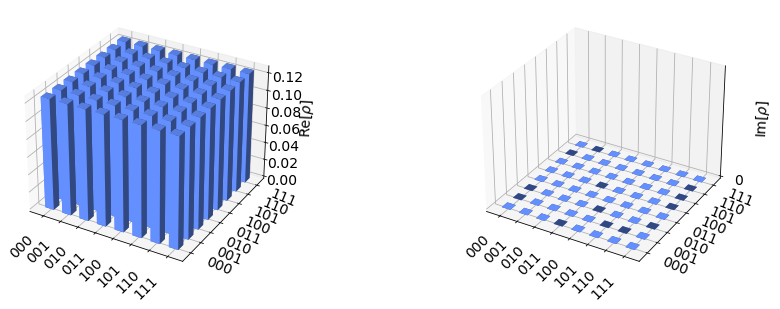

In [5]:
from qiskit.visualization import plot_state_city
plot_state_city(out)

In [6]:
meas = QuantumCircuit(3,3)
meas.measure(2,2)

qc = qc+ meas
qc.draw()

┌───┐      
q_0: ───────────────────■──────────────■─────┤ H ├─X────
                        │     ┌───┐┌───┴────┐└───┘ │    
q_1: ─────────■─────────┼─────┤ H ├┤ P(π/2) ├──────┼────
     ┌───┐┌───┴────┐┌───┴────┐└───┘└────────┘      │ ┌─┐
q_2: ┤ H ├┤ P(π/2) ├┤ P(π/4) ├─────────────────────X─┤M├
     └───┘└────────┘└────────┘                       └╥┘
c: 3/═════════════════════════════════════════════════╩═
                                                      2

{'000': 506, '100': 518}


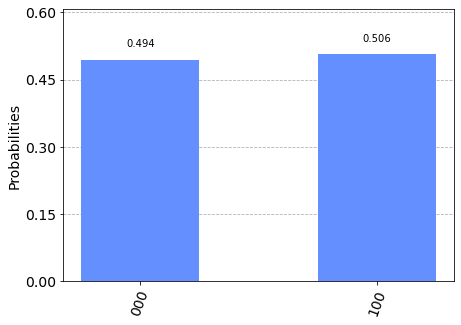

In [7]:
backend= Aer.get_backend('qasm_simulator')
job= execute(qc,backend,shots=1024)
result=job.result()

counts = result.get_counts(qc)
print(counts)
plot_histogram(counts)

In [8]:
IBMQ.enable_account('a4dca716900de5e2dce6fb05aa1b41dcb84729e3d3404179c324c5790cbf3f3271d312899da95c7cfdd172874dbaaadac9e72b27124053867e0ce1fc0d7b1ffd')

C:\Users\malid\anaconda3\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:109: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

# Generalized QFT

In [9]:
def qft_rotation(circuit,n):
    if n == 0:
        return circuit #stop condition
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(np.pi/2**(n-qubit),qubit, n)
    qft_rotation(circuit,n) #creates a loop, reducing n by one and will stop when n = 0


In [10]:
#testing with 4 qb
qc = QuantumCircuit(4)
qft_rotation(qc,4)
qc.draw()

»
q_0: ─────────■──────────────────────────────────■────────────────────»
              │                                  │               ┌───┐»
q_1: ─────────┼─────────■────────────────────────┼─────────■─────┤ H ├»
              │         │               ┌───┐┌───┴────┐┌───┴────┐└───┘»
q_2: ─────────┼─────────┼─────────■─────┤ H ├┤ P(π/4) ├┤ P(π/2) ├─────»
     ┌───┐┌───┴────┐┌───┴────┐┌───┴────┐└───┘└────────┘└────────┘     »
q_3: ┤ H ├┤ P(π/8) ├┤ P(π/4) ├┤ P(π/2) ├──────────────────────────────»
     └───┘└────────┘└────────┘└────────┘                              »
«               ┌───┐
«q_0: ────■─────┤ H ├
«     ┌───┴────┐└───┘
«q_1: ┤ P(π/2) ├─────
«     └────────┘     
«q_2: ───────────────
«                    
«q_3: ───────────────
«

In [11]:
#testing with 5 qb
qc = QuantumCircuit(5)
qft_rotation(qc,5)
qc.draw()

»
q_0: ──────────■────────────────────────────────────────────■───────────────»
               │                                            │               »
q_1: ──────────┼─────────■──────────────────────────────────┼─────────■─────»
               │         │                                  │         │     »
q_2: ──────────┼─────────┼─────────■────────────────────────┼─────────┼─────»
               │         │         │               ┌───┐┌───┴────┐┌───┴────┐»
q_3: ──────────┼─────────┼─────────┼─────────■─────┤ H ├┤ P(π/8) ├┤ P(π/4) ├»
     ┌───┐┌────┴────┐┌───┴────┐┌───┴────┐┌───┴────┐└───┘└────────┘└────────┘»
q_4: ┤ H ├┤ P(π/16) ├┤ P(π/8) ├┤ P(π/4) ├┤ P(π/2) ├─────────────────────────»
     └───┘└─────────┘└────────┘└────────┘└────────┘                         »
«                                                       ┌───┐
«q_0: ───────────────────■────────────────────────■─────┤ H ├
«                        │               ┌───┐┌───┴────┐└───┘
«q_1: ───────────────────┼─────────■─────┤ H ├┤ P(π/2) ├─────
«               ┌───┐┌───┴────┐┌───┴────┐└───┘└────────┘     
«q_2: ────■─────┤ H ├┤ P(π/4) ├┤ P(π/2) ├────────────────────
«     ┌───┴────┐└───┘└────────┘└────────┘                    
«q_3: ┤ P(π/2) ├─────────────────────────────────────────────
«     └────────┘                                             
«q_4: ───────────────────────────────────────────────────────
«

In [12]:
def swapregisters(circuit,n):
    for qubit in range(n//2):
        circuit.swap(qubit,n-qubit-1)
    return circuit


In [13]:
def qft(circuit,n):
    qft_rotation(circuit,n)
    swapregisters(circuit,n)
    return circuit

In [14]:
qc = QuantumCircuit(4)
qft(qc,4)
qc.draw()

»
q_0: ─────────■──────────────────────────────────■────────────────────»
              │                                  │               ┌───┐»
q_1: ─────────┼─────────■────────────────────────┼─────────■─────┤ H ├»
              │         │               ┌───┐┌───┴────┐┌───┴────┐└───┘»
q_2: ─────────┼─────────┼─────────■─────┤ H ├┤ P(π/4) ├┤ P(π/2) ├─────»
     ┌───┐┌───┴────┐┌───┴────┐┌───┴────┐└───┘└────────┘└────────┘     »
q_3: ┤ H ├┤ P(π/8) ├┤ P(π/4) ├┤ P(π/2) ├──────────────────────────────»
     └───┘└────────┘└────────┘└────────┘                              »
«               ┌───┐   
«q_0: ────■─────┤ H ├─X─
«     ┌───┴────┐└───┘ │ 
«q_1: ┤ P(π/2) ├──X───┼─
«     └────────┘  │   │ 
«q_2: ────────────X───┼─
«                     │ 
«q_3: ────────────────X─
«

In [15]:
print(bin(5)) #5 in binary is 101
#encode state 5
qc = QuantumCircuit(3)
qc.x(0)
qc.x(2)
qc.draw()

0b101


┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
     ┌───┐
q_2: ┤ X ├
     └───┘

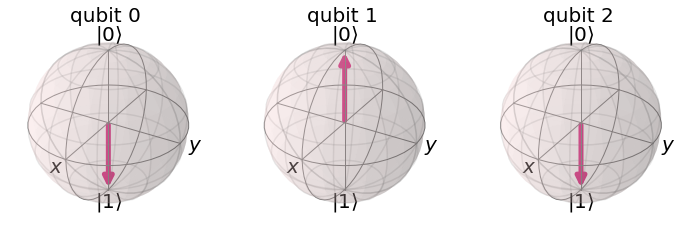

In [16]:
statevec_sim = Aer.get_backend('statevector_simulator')
job = assemble(qc)
statevector = statevec_sim.run(job).result().get_statevector()

plot_bloch_multivector(statevector)

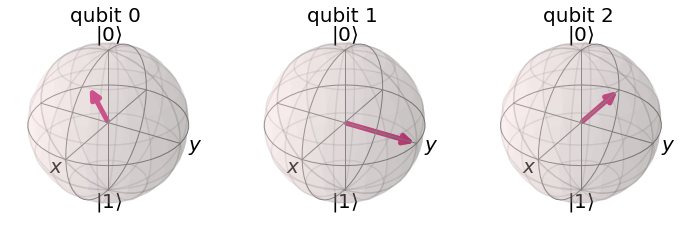

In [17]:
qft(qc,3)
qc.draw()

job = assemble(qc)
statevector = statevec_sim.run(job).result().get_statevector()
plot_bloch_multivector(statevector)

In [18]:
print(bin(13))

0b1101


In [19]:
qc = QuantumCircuit(4)
qc.x(0)
qc.x(1)
qc.x(3)
qc.draw()

┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ X ├
     └───┘
q_2: ─────
     ┌───┐
q_3: ┤ X ├
     └───┘

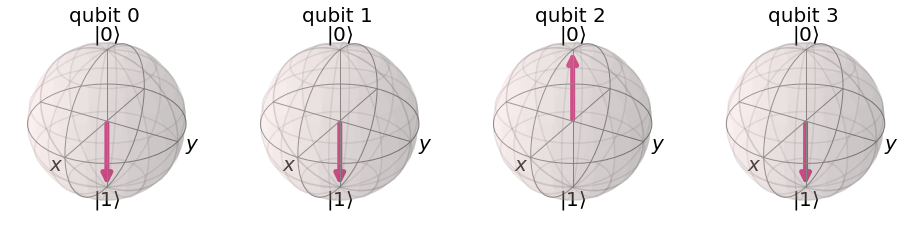

In [20]:
statevec_sim = Aer.get_backend('statevector_simulator')
job = assemble(qc)
statevector = statevec_sim.run(job).result().get_statevector()

plot_bloch_multivector(statevector)

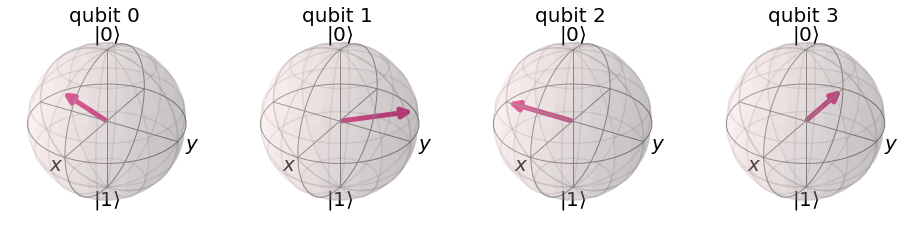

In [21]:
qft(qc,4)
qc.draw()

job = assemble(qc)
statevector = statevec_sim.run(job).result().get_statevector()
plot_bloch_multivector(statevector)

In [22]:
def inverse_qft(circuit,n):
    qft_qc = qft(QuantumCircuit(n),n) #create a QFT circuit size n
    inqft_qc =qft_qc.inverse() #incerse circuit
    circuit.append(inqft_qc , circuit.qubits[:n]) #add to existing circuit
    return circuit.decompose()
    

In [23]:
nqb = 3
num = 5
qc = QuantumCircuit(nqb)
for qubit in range(nqb):
    qc.h(qubit)
    
qc.p(num*np.pi/4,0)
qc.p(num*np.pi/2,1)
qc.p(num*np.pi,2)

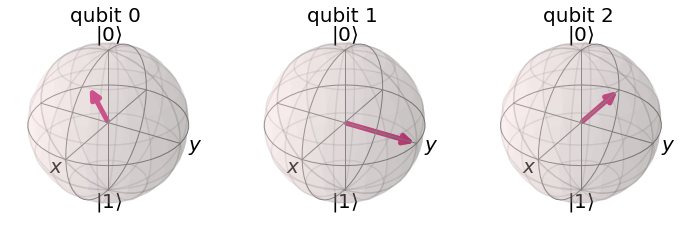

In [24]:
statevec_sim = Aer.get_backend('statevector_simulator')
job = assemble(qc)
statevector = statevec_sim.run(job).result().get_statevector()
plot_bloch_multivector(statevector)

In [25]:
qc = inverse_qft(qc,nqb)
qc.measure_all()
qc.draw()

┌─────────┐┌─────────────┐   ┌───┐                           »
   q_0: ┤ U2(0,π) ├┤ U(0,0,5π/4) ├─X─┤ H ├─────■─────────────────────»
        ├─────────┤├─────────────┤ │ └───┘┌────┴────┐┌───┐           »
   q_1: ┤ U2(0,π) ├┤ U(0,0,5π/2) ├─┼──────┤ P(-π/2) ├┤ H ├─────■─────»
        ├─────────┤└┬───────────┬┘ │      └─────────┘└───┘┌────┴────┐»
   q_2: ┤ U2(0,π) ├─┤ U(0,0,5π) ├──X──────────────────────┤ P(-π/2) ├»
        └─────────┘ └───────────┘                         └─────────┘»
meas: 3/═════════════════════════════════════════════════════════════»
                                                                     »
«                         ░ ┌─┐      
«   q_0: ─────■───────────░─┤M├──────
«             │           ░ └╥┘┌─┐   
«   q_1: ─────┼───────────░──╫─┤M├───
«        ┌────┴────┐┌───┐ ░  ║ └╥┘┌─┐
«   q_2: ┤ P(-π/4) ├┤ H ├─░──╫──╫─┤M├
«        └─────────┘└───┘ ░  ║  ║ └╥┘
«meas: 3/════════════════════╩══╩══╩═
«                            0  1  2

In [26]:
shots = 2048
transpiled_qc = transpile(qc, backend, optimization_level=3)
qobj = assemble(transpiled_qc, shots=shots)
job = backend.run(qobj)
job_monitor(job)

Job Status: job has successfully run


In [27]:

provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= nqb 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmqx2


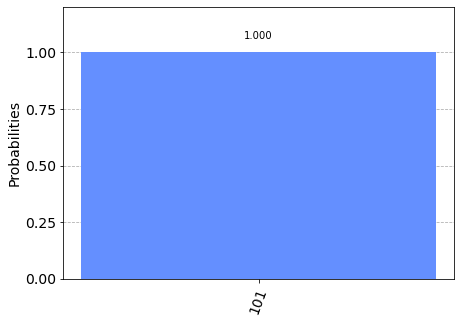

In [28]:
counts = job.result().get_counts()
plot_histogram(counts)

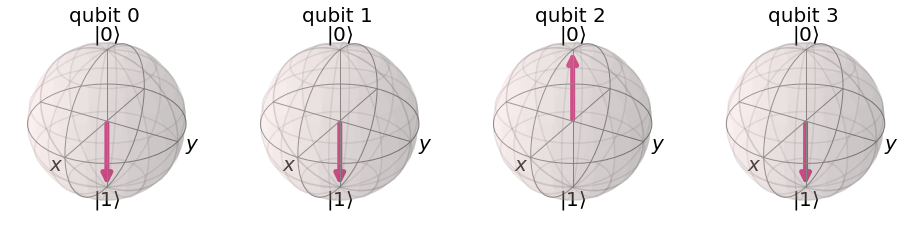

In [29]:
nqb = 4
num = 13
qc = QuantumCircuit(nqb)
qc.x(0)
qc.x(1)
qc.x(3)
qc.draw()

statevec_sim = Aer.get_backend('statevector_simulator')
job = assemble(qc)
statevector = statevec_sim.run(job).result().get_statevector()
plot_bloch_multivector(statevector)



In [30]:
qc = inverse_qft(qc,nqb)
qc.measure_all()
qc.draw()



┌───────────┐      ┌───┐                                           »
   q_0: ┤ U3(π,0,π) ├────X─┤ H ├─────■──────────────────────────■──────────»
        ├───────────┤    │ └───┘┌────┴────┐┌───┐                │          »
   q_1: ┤ U3(π,0,π) ├─X──┼──────┤ P(-π/2) ├┤ H ├─────■──────────┼──────────»
        └───────────┘ │  │      └─────────┘└───┘┌────┴────┐┌────┴────┐┌───┐»
   q_2: ──────────────X──┼──────────────────────┤ P(-π/2) ├┤ P(-π/4) ├┤ H ├»
        ┌───────────┐    │                      └─────────┘└─────────┘└───┘»
   q_3: ┤ U3(π,0,π) ├────X─────────────────────────────────────────────────»
        └───────────┘                                                      »
meas: 4/═══════════════════════════════════════════════════════════════════»
                                                                           »
«                                               ░ ┌─┐         
«   q_0: ───────────────────────────■───────────░─┤M├─────────
«                                   │           ░ └╥┘┌─┐      
«   q_1: ────────────────■──────────┼───────────░──╫─┤M├──────
«                        │          │           ░  ║ └╥┘┌─┐   
«   q_2: ─────■──────────┼──────────┼───────────░──╫──╫─┤M├───
«        ┌────┴────┐┌────┴────┐┌────┴────┐┌───┐ ░  ║  ║ └╥┘┌─┐
«   q_3: ┤ P(-π/2) ├┤ P(-π/4) ├┤ P(-π/8) ├┤ H ├─░──╫──╫──╫─┤M├
«        └─────────┘└─────────┘└─────────┘└───┘ ░  ║  ║  ║ └╥┘
«meas: 4/══════════════════════════════════════════╩══╩══╩══╩═
«                                                  0  1  2  3

In [31]:
shots = 2048
transpiled_qc = transpile(qc, backend, optimization_level=3)
qobj = assemble(transpiled_qc, shots=shots)
job = backend.run(qobj)
job_monitor(job)


provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= nqb 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)


Job Status: job has successfully run
least busy backend:  ibmqx2


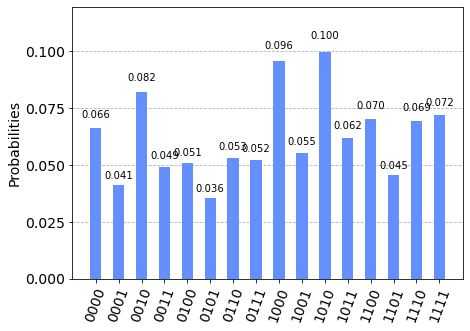

In [32]:

counts = job.result().get_counts()
plot_histogram(counts)